In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

In [8]:
dataset = pd.read_json('data/paper_data.json')
random_tcc_dataset = dataset[dataset['mode'].isin(['RANDOM{}'.format(i) for i in range(0, 61,12)])]
evaluation_result_dataset = dataset[dataset['mode'] == 'ADAPTIVE1']

In [10]:
hue = dataset.groupby('user_id')['mode'].first().map(lambda x: 'RANDOM' if x[:4] == 'RAND' else 'Pred-RC')

mean = dataset.groupby('user_id').mean(numeric_only=True)
mean['hue'] = hue
mean['f1'] = dataset.groupby('user_id').apply(lambda grp: f1_score(
        grp['action'] == 'AI',
        grp['is_AI_correct']
        )
    )

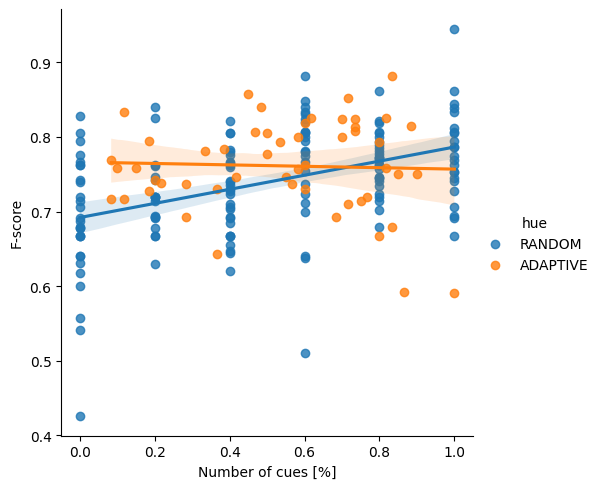

In [15]:
sns.lmplot(data=mean, x='instance_conf_shown', y='f1', hue='hue')
plt.xlabel('Number of cues [%]')
plt.ylabel('F-score')
plt.show()